# PARKINSON'S DISEASE DETECTION USING CLASSIFICATION ALGORITHM

We have a dataset of 195 patients. Based on various attributes, it is determined whether these patients suffer from Parkinson's disease or not. We shall fit a Classification model to the dataset to achieve an objective with highest possible accurracy of estimating whether a new patient with same attributes suffers from Parkinson's Disease or not. Below written is the context of the dataset.

**Source of the data:** Kaggle

**Context:** Parkinson’s Disease (PD) is a degenerative neurological disorder marked by decreased dopamine levels in the brain.Traditional diagnosis of Parkinson’s Disease involves a clinician taking a neurological history of the patient and observing motor skills in various situations. 

Since there is no definitive laboratory test to diagnose PD, diagnosis is often difficult, particularly in the early stages when motor effects are not yet severe. Monitoring progression of the disease over time requires repeated clinic visits by the patient. An effective screening process, particularly one that doesn’t require a clinic visit, would be beneficial. 

Since PD patients exhibit characteristic vocal features, voice recordings are a useful and non-invasive tool for diagnosis. If machine learning algorithms could be applied to a voice recording dataset to accurately diagnosis PD, this would be an effective screening step prior to an appointment with a clinician.

**Source of the context:** Kaggle

**Citation:
'Exploiting Nonlinear Recurrence and Fractal Scaling Properties for Voice Disorder Detection',
Little MA, McSharry PE, Roberts SJ, Costello DAE, Moroz IM.
BioMedical Engineering OnLine 2007, 6:23 (26 June 2007)**

The proceedure will be as follows:
1. Loading and understanding the dataset
2. Cleaning and Preprocessing the data with required Data Visualisation
3. Fitting the data to an appropriate Classification model 
4. Evaluation
5. Conclusion

## Loading and Understanding the dataset
Let us first load the data and perform various functions to understand it.

In [6]:
#Importing all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sb
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier  
from sklearn import svm  
from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
import warnings
from sklearn.neighbors import KNeighborsClassifier  
warnings.filterwarnings('ignore')
%matplotlib inline

In [7]:
#Reading the dataset
df=pd.read_csv("Parkinsson disease.csv")

#Displaying first five rows of the dataset
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [8]:
#Displaying size of the dataset
df.shape

(195, 24)

In [9]:
#Displaying all columns
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

Below mentioned list explains what these column titles mean.

1. name - ASCII subject name and recording number
2. MDVP:Fo(Hz) - Average vocal fundamental frequency
3. MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
4. MDVP:Flo(Hz) - Minimum vocal fundamental frequency
5. MDVP:Jitter(%)
6. MDVP:Jitter(Abs)
7. MDVP:RAP
8. MDVP:PPQ
9. Jitter:DDP - Several measures of variation in fundamental frequency
10. MDVP:Shimmer
11. MDVP:Shimmer(dB)
12. Shimmer:APQ3
13. Shimmer:APQ5
14. MDVP:APQ
15. Shimmer:DDA - Several measures of variation in amplitude
16. /17. NHR,HNR - Two measures of ratio of noise to tonal components in the voice
18. status - Health status of the subject (one) - Parkinson's, (zero) - healthy
19. /20. RPDE,D2 - Two nonlinear dynamical complexity measures
21. DFA - Signal fractal scaling exponent
22. /23. /24. spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation

***[The explanation has been taken from the information available along with the dataset on Kaggle.]***

In [10]:
#Displaying datatype of each column
df.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

Here, name is of object type. We do not require this column so we'll drop it to save memory.

In [11]:
#Dropping the name column
pkd = df.drop(columns='name')

#We have stored the modified dataset in 'pkd'

#Displaying first 5 rows after dropping required columns
pkd.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [12]:
#Displaying size of the dataset after dropping required columns
pkd.shape

(195, 23)

After dropping the name column, we are left with 22 columns with float datatype values and 1 column with integer datatype value. Let's get going.

In [13]:
#Displaying count, mean, standard deviation and quartiles
pkd.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [14]:
#Checking null values
pkd.isna().sum()

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

There are no null values in any column. This makes our task easier. Let's check for outliers now.

If any outliers are found, we will have to deal with them in order to have a good fit of the model.

We shall use the interquartile range to look for outliers since it is the most widely used method. 
For that we have to estimate the upper bound and lower bound, calculate quartiles and interquartile range.

We shall define  a function which performs this task so that we can call this function again and again to look for outliers in each column separately.

In [15]:
#Checking outliers

#defining the function
def outlier_check(data):
    #First quartile
    Q1 = data.quantile(0.25)
    #Third quartile
    Q3 = data.quantile(0.75)
    #Interquartile range
    IQR = Q3 - Q1
    #Estimating lower bound
    minimum = Q1 - (1.5 * IQR)
    #Estimating upper bound
    maximum = Q3 + (1.5 * IQR)
    #The data points that lie above the upper bound or below the lower bound are called outliers. 
    num_outliers =  np.sum((data < minimum) |(data > maximum))
    if num_outliers ==0:
        return "No Outliers"
    else:
        return "Outliers are present."

#Now we will check for outliers for each column.
for column in pkd:
    data =pkd[column]
    m={outlier_check(data)}
    print(f'{column}: {m}')

MDVP:Fo(Hz): {'No Outliers'}
MDVP:Fhi(Hz): {'Outliers are present.'}
MDVP:Flo(Hz): {'Outliers are present.'}
MDVP:Jitter(%): {'Outliers are present.'}
MDVP:Jitter(Abs): {'Outliers are present.'}
MDVP:RAP: {'Outliers are present.'}
MDVP:PPQ: {'Outliers are present.'}
Jitter:DDP: {'Outliers are present.'}
MDVP:Shimmer: {'Outliers are present.'}
MDVP:Shimmer(dB): {'Outliers are present.'}
Shimmer:APQ3: {'Outliers are present.'}
Shimmer:APQ5: {'Outliers are present.'}
MDVP:APQ: {'Outliers are present.'}
Shimmer:DDA: {'Outliers are present.'}
NHR: {'Outliers are present.'}
HNR: {'Outliers are present.'}
status: {'Outliers are present.'}
RPDE: {'No Outliers'}
DFA: {'No Outliers'}
spread1: {'Outliers are present.'}
spread2: {'Outliers are present.'}
D2: {'Outliers are present.'}
PPE: {'Outliers are present.'}


As we note from above, 20 columns have outliers and **MDVP:Fp(Hz), RPDE, DFA** are the columns that don't have outliers. We need to remove these outliers in order to eradicate the noise in the dataset. We shall perform this in the data cleaning and preprocessing step.

## Cleaning and preprocessing the data

Since we have gained a good knowledge about our dataset, let us now clean and preprocess the data.

In the previous step, we checked for null values and outliers. Since no null values were found, our task got a bit easier but then we found that 20 columns have outliers. We shall remove these outliers first before we proceed to standardize our data.

In [16]:
#Removing outliers
for column in pkd.columns:
    d = pkd[column] 
    #First quartile    
    Q1 = d.quantile(0.25)
    #Third quartile
    Q3 = d.quantile(0.75)
    IQR = Q3 - Q1
    #Estimating lower bound
    minimum = Q1 - (1.5 * IQR)
    #Estimating upper bound
    maximum = Q3 + (1.5 * IQR)
    #The data points that lie above the upper bound or below the lower bound are called outliers. 
    outliers = ((d < minimum) |(d > maximum))
    #Replacing outliers with NaN which will be eventually dealt with in the next step.
    pkd[column].loc[outliers]=np.nan
#Displaying number of outliers in each column which are now replaced with NaN values    
pkd.isna().sum()

MDVP:Fo(Hz)          0
MDVP:Fhi(Hz)        11
MDVP:Flo(Hz)         9
MDVP:Jitter(%)      14
MDVP:Jitter(Abs)     7
MDVP:RAP            14
MDVP:PPQ            15
Jitter:DDP          14
MDVP:Shimmer         8
MDVP:Shimmer(dB)    10
Shimmer:APQ3         6
Shimmer:APQ5        13
MDVP:APQ            12
Shimmer:DDA          6
NHR                 19
HNR                  3
status              48
RPDE                 0
DFA                  0
spread1              4
spread2              2
D2                   1
PPE                  5
dtype: int64

We removed outliers from all columns and replaced them with NaN values. Now, we shall deal with these NaN values.

We shall fill all these null vaues with the mean values of respective columns.

In [17]:
#Replacing null values with mean value of respective columns
for column in pkd:
    pkd[column].fillna(int(df[column].mean()), inplace=True)

Let us check if all Nan values are dealt with.

In [18]:
#Checking null values
pkd.isna().sum()

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

As we can see, all columns have 0 null values. This means we have succesfully removed outliers and replaced them with the mean values.



## Data Visualisation

Let us do some plotting now.

We shall plot a correlation heat map of our data and see what changes can be made in our dataset before Train-Test split.

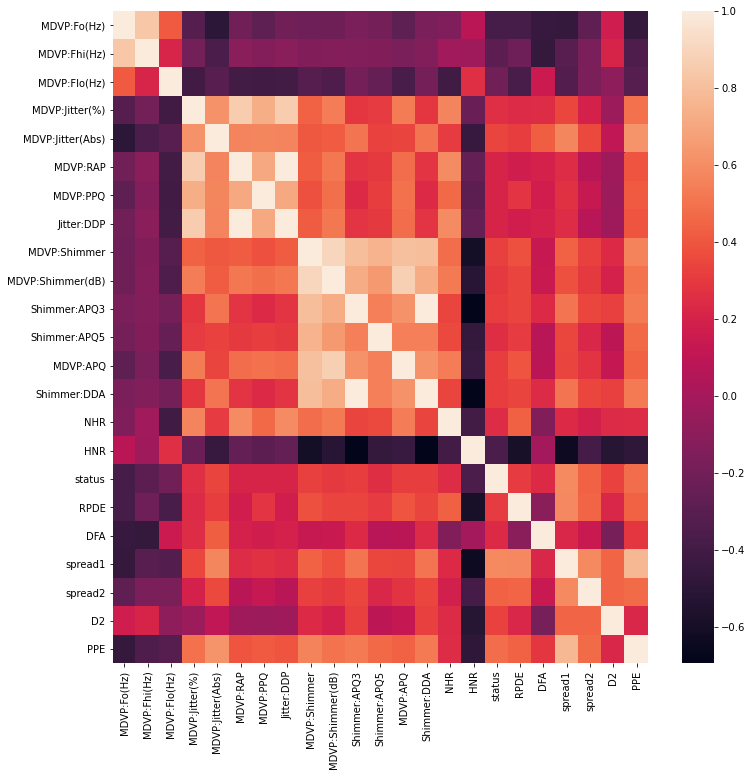

In [19]:
#Plotting correlation heat map
plt.figure(figsize = (12, 12))
dataplot=sb.heatmap(pkd.corr())

From the above plot, it is pretty evident that 
1. Jitter: DDP and MDVP:RAP 
2. Shimmer: DDA and Shimmer:APQ3

have a really high correlation i.e.: 1.

This means that we have full liberty to drop 
1. either Jitter: DDP or MDVP:RAP 
2. either Shimmer: DDA or Shimmer:APQ3

without affecting our results. So, let's do it.

In [20]:
#Dropping columns with high correlation
pkd.drop(columns=['Jitter:DDP','Shimmer:DDA'],inplace=True)


Let us now standardise our data.

The status column has values 0 and 1 representing 'Healthy' and 'Parkinson's' respectively. We don't need this column to get standardized. So, we'll first create X(independent variable) and Y(dependent variable) and then standardise X while leaving Y as it is.

In [21]:
#Defining x(independent variable)
feature_pkd=pkd[['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'NHR', 'HNR', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE']]
x=np.asarray(feature_pkd)

In [22]:
#Standardising X(independent variable)
X = pd.DataFrame(StandardScaler().fit_transform(x))

In [23]:
#Defining Y(dependent variable)
Y=np.asarray(pkd['status'])

Now, we shall perform the train-test split of our data.

In [24]:
#Train-Test split of our dataset
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [25]:
print("shape of original dataset :", pkd.shape)
print("shape of input training set", X_train.shape)
print("shape of output training set", Y_train.shape)
print("shape of input testing set", X_test.shape)
print("shape of output testing set", Y_test.shape)

shape of original dataset : (195, 21)
shape of input training set (156, 20)
shape of output training set (156,)
shape of input testing set (39, 20)
shape of output testing set (39,)


We are done with the cleaning and preprocessing of data. Let us start with modelling.

## Fitting the data to a KNN model

We shall now fit our data to a KNN model. 

First, we need to find the appropriate value of k.

In [26]:
#Finding optimal k by fitting the data to a KNN model
ac_scores=[]
mylist=list(range(1,20))
neighbors=list(filter(lambda x:x%2!=0,mylist))
for k in neighbors:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train)
    Y_pred=knn.predict(X_test)
    scores=accuracy_score(Y_test,Y_pred)
    ac_scores.append(scores)
optimal_k=neighbors[ac_scores.index(max(ac_scores))]
print(optimal_k)

9


The optimal value of k = 9. This value of k shall now be used to predict Y based on X when any new entry is introduced.

## Fitting the data to a Decision Tree model

Let us fit the data to a Decision Tree model.

In [27]:
#Fitting the data to a Decision Tree model.
drugTree=DecisionTreeClassifier(criterion="entropy",max_depth=4)
drugTree.fit(X_train,Y_train)
predTree=drugTree.predict(X_test)

## Fitting the data to an SVM model

Let us fit the data to an SVM model.

In [28]:
#Fitting the data to an SVM model
clf=svm.SVC(kernel='rbf')
clf.fit(X_train,Y_train)
Yhat=clf.predict(X_test)

## Fitting the data to a Logistic Regression model

Let us fit the data to a Logistic Regression model.

In [34]:
#Fitting the data to a Logistic Reression model
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,Y_train)
yhat_prob = LR.predict_proba(X_test)
yhat_pred=LR.predict(X_test)

## Evaluation

Let us now check the accuracy of KNN model using Jaccard index and F1-score.

In [30]:
#Jaccard Index
j1=metrics.accuracy_score(Y_test, Y_pred)
print("Train set Accuracy for KNN using Jaccard Index: ", metrics.accuracy_score(Y_train, knn.predict(X_train)))
print("Test set Accuracy for KNN using Jaccard Index: ", metrics.accuracy_score(Y_test, Y_pred))

#F1-Score
f1=f1_score(Y_test, knn.predict(X_test), average='weighted')
print("Train set accuracy for KNN using f1 score:",f1_score(Y_train, knn.predict(X_train), average='weighted'))
print("Test set accuracy for KNN using f1 score:",f1_score(Y_test, knn.predict(X_test), average='weighted'))

Train set Accuracy for KNN using Jaccard Index:  0.8333333333333334
Test set Accuracy for KNN using Jaccard Index:  0.8461538461538461
Train set accuracy for KNN using f1 score: 0.8064886592018374
Test set accuracy for KNN using f1 score: 0.8401709401709402


Let us now check the accuracy of Decision Tree model using Jaccard index and F1-score.

In [31]:
#Jaccard Index
j2=metrics.accuracy_score(Y_test,predTree)
print("Train set Accuracy for Decision Tree using Jaccard Index:",metrics.accuracy_score(Y_train,drugTree.predict(X_train)))
print("Test set Accuracy for Decision Tree usin Jaccard Index:",metrics.accuracy_score(Y_test,predTree))

#F1-Score
f2=f1_score(Y_test, drugTree.predict(X_test), average='weighted')
print("Train set accuracy for Decision Tree using f1 score:",f1_score(Y_train, drugTree.predict(X_train), average='weighted'))
print("Test set accuracy for Decision Tree using f1 score:",f1_score(Y_test, drugTree.predict(X_test), average='weighted'))

Train set Accuracy for Decision Tree using Jaccard Index: 0.9487179487179487
Test set Accuracy for Decision Tree usin Jaccard Index: 0.8974358974358975
Train set accuracy for Decision Tree using f1 score: 0.9477207977207976
Test set accuracy for Decision Tree using f1 score: 0.9021842355175688


Let us now check the accuracy of SVM model using Jaccard index and F1-score.

In [32]:
#jaccard Index
j3=metrics.accuracy_score(Y_test,Yhat)
print("Train set Accuracy for SVM using Jaccard Index:",metrics.accuracy_score(Y_train,clf.predict(X_train)))
print("Train set Accuracy for SVM using Jaccard Index:",metrics.accuracy_score(Y_test,Yhat))

#F1-score
f3=f1_score(Y_test, clf.predict(X_test), average='weighted')
print("Train set accuracy for SVM using f1 score:",f1_score(Y_train, clf.predict(X_train), average='weighted'))
print("Test set accuracy for SVM using f1 score:",f1_score(Y_test, clf.predict(X_test), average='weighted'))

Train set Accuracy for SVM using Jaccard Index: 0.9294871794871795
Train set Accuracy for SVM using Jaccard Index: 0.8974358974358975
Train set accuracy for SVM using f1 score: 0.9250908335928579
Test set accuracy for SVM using f1 score: 0.8934472934472933


Let us now check the accuracy of Logistic Regression model using Jaccard index, F1-score and log loss.

In [35]:
#Jaccard Index
j4=metrics.accuracy_score(Y_test, yhat_pred)
print("Train set Accuracy for Logistic Regression using Jaccard Index: ", metrics.accuracy_score(Y_train, LR.predict(X_train)))
print("Test set Accuracy for Logistic Regression using Jaccard Index:", metrics.accuracy_score(Y_test, yhat_pred))

#F1-Score
f4=f1_score(Y_test, LR.predict(X_test), average='weighted')
print("Train set accuracy for Logistic Regression using f1 score:",f1_score(Y_train, LR.predict(X_train), average='weighted'))
print("Test set accuracy for Logistic Regression using f1 score:",f1_score(Y_test, LR.predict(X_test), average='weighted'))

#Log loss
lr_pred = LR.predict_proba(X_test)
lr_pred_train=LR.predict_proba(X_train)
print("Train set accuracy for Logistic Regression using Log Loss:",log_loss(Y_train, lr_pred_train))
print("Test set accuracy for Logistic Regression using Log Loss:",log_loss(Y_test, lr_pred))
l4=log_loss(Y_test, lr_pred)

Train set Accuracy for Logistic Regression using Jaccard Index:  0.782051282051282
Test set Accuracy for Logistic Regression using Jaccard Index: 0.8461538461538461
Train set accuracy for Logistic Regression using f1 score: 0.7910735098235099
Test set accuracy for Logistic Regression using f1 score: 0.8503996003996005
Train set accuracy for Logistic Regression using Log Loss: 0.5102952688355087
Test set accuracy for Logistic Regression using Log Loss: 0.4745893372431901


## Conclusion

We have fit our data to 4 models. Let us jot down accuracies of these 4 models to determine which model is the best.

In [37]:
js=[j1,j2,j3,j4]
f1s=[f1,f2,f3,f4]
ll=['NA','NA','NA',l4]
index   = ["KNN", "Decision Tree", "SVM", "Logistic Regression"]
colunms = ["Jaccard", "F1-score", "LogLoss"]

data = [js, f1s, ll]
data = np.array(data).T

df = pd.DataFrame(data, index=index, columns=colunms)
df

,Jaccard,F1-score,LogLoss
KNN,0.8461538461538461,0.8401709401709402,NA
Decision Tree,0.8974358974358975,0.9021842355175688,NA
SVM,0.8974358974358975,0.8934472934472933,NA
Logistic Regression,0.8461538461538461,0.8503996003996005,0.4745893372431901


From the above table, it can be easily seen that **Decsision Tree proves to be the best model with the highest accuracy.**

### Therefore, the most appropriate model of classification will be **Decision Tree** for our dataset.

**Author:** Amisha Sahoo

**Dataset source:** Kaggle